<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0.0.1">Импорт библиотек</a></span></li></ul></li></ul></li><li><span><a href="#Загрузка-таблиц" data-toc-modified-id="Загрузка-таблиц-1">Загрузка таблиц</a></span></li><li><span><a href="#Первичное-исследование-таблиц" data-toc-modified-id="Первичное-исследование-таблиц-2">Первичное исследование таблиц</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#case_ids" data-toc-modified-id="case_ids-2.0.1">case_ids</a></span></li><li><span><a href="#collisions" data-toc-modified-id="collisions-2.0.2">collisions</a></span></li><li><span><a href="#parties" data-toc-modified-id="parties-2.0.3">parties</a></span></li><li><span><a href="#vehicles" data-toc-modified-id="vehicles-2.0.4">vehicles</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Статистический-анализ-факторов-ДТП" data-toc-modified-id="Статистический-анализ-факторов-ДТП-3">Статистический анализ факторов ДТП</a></span><ul class="toc-item"><li><span><a href="#Создание-аналитических-задач" data-toc-modified-id="Создание-аналитических-задач-3.1">Создание аналитических задач</a></span></li></ul></li><li><span><a href="#Создание-модели-для-оценки-водительского-риска" data-toc-modified-id="Создание-модели-для-оценки-водительского-риска-4">Создание модели для оценки водительского риска</a></span><ul class="toc-item"><li><span><a href="#Подготовка-набора-данных" data-toc-modified-id="Подготовка-набора-данных-4.1">Подготовка набора данных</a></span></li><li><span><a href="#Статистическое-исследование-отобранных-факторов" data-toc-modified-id="Статистическое-исследование-отобранных-факторов-4.2">Статистическое исследование отобранных факторов</a></span></li><li><span><a href="#Корректировка-признаков" data-toc-modified-id="Корректировка-признаков-4.3">Корректировка признаков</a></span></li><li><span><a href="#Подготовка-данных-к-обучению-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-моделей-4.4">Подготовка данных к обучению моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5">Вывод</a></span></li></ul></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-5">Поиск лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1">Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.2">Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг-CatBoost" data-toc-modified-id="Градиентный-бустинг-CatBoost-5.3">Градиентный бустинг CatBoost</a></span></li><li><span><a href="#Градиентный-бустинг-LightGBM" data-toc-modified-id="Градиентный-бустинг-LightGBM-5.4">Градиентный бустинг LightGBM</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-5.5">Сравнение моделей</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-в-работе" data-toc-modified-id="Проверка-лучшей-модели-в-работе-6">Проверка лучшей модели в работе</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7">Вывод</a></span></li></ul></div>

# Разработка системы предупреждения аварий на каршеринге

Для каршеринговой компании необходимо создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика: 
1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
    * Для модели выбрать тип виновника — только машина (car).
    * Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    * Для моделирования ограничиться данными за 2012 год — они самые свежие.
    * Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.
3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    * Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    * Какие ещё факторы нужно учесть?
    * Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?


**Цель проекта:**  
Разработать модель для предсказания ДТП.

**Задачи:**
* провести первичное исследование таблиц в базе данных
* провести статистический анализ факторов ДТП
* подготовить набор данных, отобрать факторы, влияющие на вероятность ДТП
* смоделировать несколько типов моделей с перебором гиперпараметров, определить лучшую модель
* проверить лучшую модель на тестовой выборке: провести графический анализ результатов модели, проанализировать важность основных факторов
* провести дополнительное исследование для одного из важных факторов

#### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

try:
    from pandas_profiling import ProfileReport
except:
    !pip3 install pandas-profiling
    from pandas_profiling import ProfileReport

from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.3f}'.format

import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)

RANDOM_STATE = 12345


## Загрузка таблиц

Подключаемся к базе данных

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Предварительно выведем названия таблиц, содержащися в базе данных

In [4]:
query = '''
SELECT
    table_name
FROM
    information_schema.tables
WHERE
    table_schema NOT IN ('pg_catalog', 'information_schema');
'''
table_names = pd.read_sql_query(query, con=engine) 

In [5]:
table_names

,table_name
0,case_ids
1,collisions
2,parties
3,vehicles


В базе данных содержатся 4 таблицы, что соответсвует описанию данных.

Описание таблиц:

* **collisions** — общая информация о ДТП

    Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
    

* **parties** — информация об участниках ДТП

    Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
    

* **vehicles** — информация о пострадавших машинах

    Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

## Первичное исследование таблиц

Для первичного исследования таблиц рассмотрим все 4 таблицы: проверим, как таблицы связаны и все ли их них будут нам полезны в дальнейшем; выведем некоторое количество строк таблиц, проверим их структуру и наличие каких-то особенностей.

#### case_ids

Выведем первые 10 строк таблицы.

In [6]:
query = '''
SELECT
    *
FROM
    case_ids
LIMIT 10;
'''
pd.read_sql_query(query, con=engine) 

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
5,3899445,2021
6,3899446,2021
7,3899449,2021
8,3899450,2021
9,3899453,2021


Посчитаем общее количество строк в таблице и количество уникальных case_id. Убедимся, что данные не содержат пропусков

In [7]:
query = '''
SELECT
    COUNT(*) AS total_count,
    COUNT(DISTINCT case_id) AS unique_ids,
    COUNT(*) - COUNT(case_id) as case_id_NA,
    COUNT(*) - COUNT(db_year) as db_year_NA
FROM
    case_ids;
'''
pd.read_sql_query(query, con=engine) 

,total_count,unique_ids,case_id_na,db_year_na
0,1400000,1400000,0,0


Выведем уникальные значения столбца db_year

In [8]:
query = '''
SELECT
    DISTINCT db_year
FROM
    case_ids;
'''
pd.read_sql_query(query, con=engine) 

,db_year
0,2021


В таблице case_ids содержатся поля case_id и db_year, причём поле db_year содержит только значение 2021. Согласно описанию данных, уникальный case_id является ключом для связи с другими таблицами и содержится также в таблице collisions.   
В дальнейшем мы проверим, совпадают ли все уникальные значения case_id в таблицах case_ids и collisions, и, в случае, если они совпадают, таблицу case_id можно будет не использовать в дальнейшем анализе.

#### collisions

Посчитаем количество строк в таблице

In [9]:
query = '''
SELECT
    COUNT(*)
FROM
    collisions;
'''
pd.read_sql_query(query, con=engine)

,count
0,1400000


Количество строк такое же, как и в case_ids.

Убедимся, что case_id содержит только уникальные значения, и что case_id из таблицы collisions совпадают с case_id из таблицы case_ids.

In [10]:
query = '''
SELECT
    COUNT(DISTINCT case_id)
FROM
    collisions
WHERE 
    case_id IN (SELECT case_id 
                FROM case_ids);
'''
pd.read_sql_query(query, con=engine)

,count
0,1400000


Полученное количество уникальных case_id совпадает для обоих таблиц (case_ids и collisions), поэтому при дальнейшем анализе таблицу case_ids использовать не будем.

Получим первые 100 строк таблицы и выведем информацию о них.

In [11]:
query = '''
SELECT
    *
FROM
    collisions
LIMIT 100;
'''
collisions = pd.read_sql_query(query, con=engine) 

In [12]:
print(collisions.info())
collisions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      100 non-null    object 
 1   county_city_location         100 non-null    object 
 2   county_location              100 non-null    object 
 3   distance                     100 non-null    float64
 4   direction                    66 non-null     object 
 5   intersection                 100 non-null    int64  
 6   weather_1                    98 non-null     object 
 7   location_type                34 non-null     object 
 8   collision_damage             100 non-null    object 
 9   party_count                  100 non-null    int64  
 10  primary_collision_factor     99 non-null     object 
 11  pcf_violation_category       98 non-null     object 
 12  type_of_collision            99 non-null     object 
 13  motor_vehicle_involve

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.000,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.000,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.000,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.000,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.000,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


В табле collisions содержится много пропусков - с их обработкой нам придётся столкнуться в дальнейшем.

Посмотрим, за какой период представлены данные.

In [13]:
query = '''
SELECT
    MIN(collision_date::date),
    MAX(collision_date::date)
FROM
    collisions;
'''
pd.read_sql_query(query, con=engine) 

,min,max
0,2009-01-01,2020-07-26


Данные о ДТП собирались более 10 лет.

Посмотрим топ-10 географических районов с максимальным количеством аварий

In [14]:
query = '''
SELECT
    DISTINCT county_location,
    COUNT(case_id) OVER (PARTITION BY county_location) as case_number
FROM
    collisions
ORDER BY case_number DESC
LIMIT 10;
'''
pd.read_sql_query(query, con=engine)

,county_location,case_number
0,los angeles,433809
1,orange,118276
2,san bernardino,79382
3,san diego,78391
4,riverside,69328
5,alameda,64553
6,sacramento,56988
7,santa clara,50786
8,ventura,32335
9,contra costa,31492


В базе представлены данные по авариям, произошедшим в США. Все районы, вошедшие в топ-10 по количеству аварий, принадлежат штату Калифорния: возможно, данные собраны только для одного штата. В дальнейшем анализе будем предполагать, что большинство представленных ДТП происходило на юго-западе США.

#### parties

Выведем общее количество записей в таблице

In [15]:
query = '''
SELECT
    COUNT(*)
FROM
    parties;
'''
pd.read_sql_query(query, con=engine)

,count
0,2752408


Получим информацию о первых 100 строках таблицы.

In [16]:
query = '''
SELECT
    *
FROM
    parties
LIMIT 50;
'''

parties = pd.read_sql_query(query, con=engine) 

In [17]:
print(parties.info())
parties.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50 non-null     int64  
 1   case_id              50 non-null     object 
 2   party_number         50 non-null     int64  
 3   party_type           49 non-null     object 
 4   at_fault             50 non-null     int64  
 5   insurance_premium    22 non-null     float64
 6   party_sobriety       48 non-null     object 
 7   party_drug_physical  28 non-null     object 
 8   cellphone_in_use     33 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.6+ KB
None


,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.000,had not been drinking,None,0.000
1,23,3899454,2,road signs,0,7.000,had not been drinking,None,0.000
2,29,3899462,2,car,0,21.000,had not been drinking,None,0.000
3,31,3899465,2,road signs,0,24.000,had not been drinking,None,0.000
4,41,3899478,2,road bumper,0,nan,not applicable,not applicable,0.000


В таблице также содержатся пропуски.

Убедимся, что все уникальные case_id вошли в данную таблицу, т.е. что в таблице содержится информация по всем стоклновениям.

In [18]:
query = '''
SELECT
    COUNT(DISTINCT case_id)
FROM
    parties;
'''
pd.read_sql_query(query, con=engine)

,count
0,1400000


Количество уникальных case_id  совпало с количеством строк в таблице collisions.

#### vehicles

Посчитаем количество записей в таблице.

In [19]:
query = '''
SELECT
    COUNT(*)
FROM
    vehicles;
'''
pd.read_sql_query(query, con=engine)

,count
0,1021234


Записей в таблице меньше, чем в предыдущих - значит, не во всех происшествиях участвовали автомобили либо не вся информация о пострадавших машинах фиксировалась в таблице.

Выведем информацию о первых 100 записях в таблице.

In [20]:
query = '''
SELECT
    *
FROM
    vehicles
LIMIT 100;
'''

vehicles = pd.read_sql_query(query, con=engine) 

In [21]:
print(vehicles.info())
vehicles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   case_id               100 non-null    object 
 2   party_number          100 non-null    int64  
 3   vehicle_type          100 non-null    object 
 4   vehicle_transmission  99 non-null     object 
 5   vehicle_age           96 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None


,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.000
1,1,3858022,1,sedan,auto,3.000
2,1175712,5305030,1,sedan,auto,3.000
3,1175717,5305033,3,sedan,auto,5.000
4,1175722,5305034,2,sedan,auto,5.000


Здесь также присутствуют пропуски.

Выведем количество уникальных case_id, вошедших в таблицу vehicles.

In [22]:
query = '''
SELECT
    COUNT(DISTINCT case_id)
FROM
    vehicles
WHERE case_id IN (SELECT case_id
                  FROM collisions);
'''
pd.read_sql_query(query, con=engine)

,count
0,792642


Таким образом, таблица vehicles описывает 57% случаев повреждения машин из всех зафиксированных ДТП.

### Вывод

В соотвествии с диаграммой базы данных, в базе содержатся 4 таблицы. Для дальнейшего анализа нам пригодятся 3 таблицы: collisions, parties и vehicles, содержащие соответственно информацию о ДТП, участниках столкновений и информацию о пострадавших машинах.
Таблицы связаны через ключ case_id, содержащийся в таблице collisions. Для связи таблиц parties и vehicles в качестве ключа должны использоваться совместно case_id и party_number.

В базе представлены данные о более 1.4 млн происшествий на юго-западе США, собранные с января 2009 года по июль 2020 года. Во всех перечисленных таблицах присуствуют поля, содержащие пропуски.

## Статистический анализ факторов ДТП

Выясним, в какие месяцы происходит наибольшее количество аварий за весь период наблюдений.

In [23]:
query = '''
SELECT
    CAST(DATE_PART('month', collision_date::date) AS INT) AS month,
    COUNT(case_id) AS collisions_number
FROM
    collisions
GROUP BY DATE_PART('month', collision_date::date);
'''
col_per_month = pd.read_sql_query(query, con=engine)

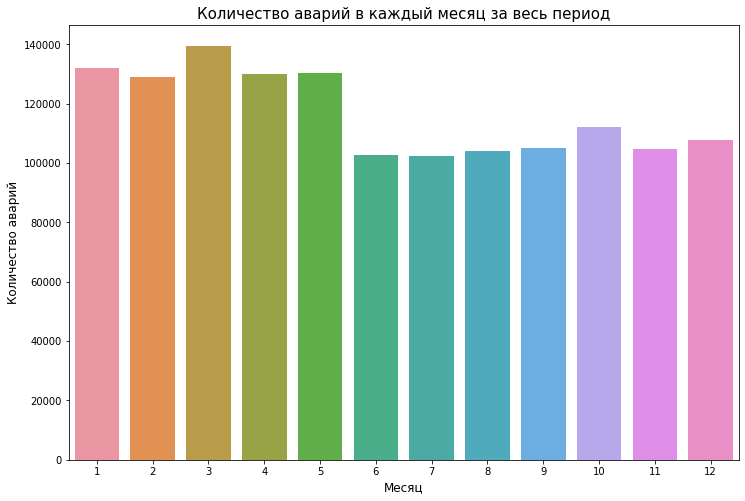

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(y='collisions_number', x='month',data = col_per_month)


plt.ylabel('Количество аварий', fontsize=12)
plt.xlabel('Месяц', fontsize=12)
plt.title('Количество аварий в каждый месяц за весь период', fontsize=15)
plt.show()

За период с января по май происходит больше ДТП, чем в последующие месяцы: из нескольких источников удалось выяснить, что в эти месяцы в Калифорнии довольно ветрено и дождливо, то есть увеличение количества ДТП может быть связано преимущественно с погодными условиями. 
Наибольшее количество аварий происходит в марте - также может влиять погода: в период февраль-март наблюдается наибольшее количество осадков.

В летние месяцы, начиная с июня, наблюдается резкое снижение количества аварий. Это может быть связано с сезоном отпусков и окончанием учебного года у школьников - то есть уменьшение количества людей на дорогах в целом

Неожиданный всплеск количества аварий на фоне постепенного осеннего роста наблюдается в октябре. Возможно, это также связано с изменением погодных условий: осенью начинают чаще идти дожди - увеличивается тормозной путь и может возникнуть водяной клин, водители могут быть не подготовлены к изменениям в погоде после летнего сезона.

### Создание аналитических задач

Для первого совещания рабочей группы необходимо создать аналитические задачи для коллег и прописать решения задач, включающих связь не менее двух таблиц.

**Задачи:**

1. Проведите анализ связи возраста автомобиля (vehicles.vehicle_age) с виновностю участника (parties.at_fault):
    * Создайте sql-запрос;
    * Постройте гистограмму, установите свойство hue на столбец 'at_fault';
    * Сделайте вывод.


2. Определите, при каких погодных условиях чаще всего возникают аварии, а также проанализируйте связь между погодными условиями и серьёзностью происшествия (таблица collisions)


3. Определите влияние состояния дороги (road_condition) на количество аварий, проанализируйте связь между состоянием дороги и серьезностью происшествия (таблица collisions)


4. Проведите анализ состояния водителя (физического или с учетом принятых лекарств) с типом аварии (связь collisions.type_of_collision и parties.party_drug_physical)
    * Создайте sql-запрос;
    * Постройте гистограмму для количества аварий каждого типа, свойство hue установите на столбец с состоянием водителя;
    * Сделайте вывод.


5. Определите, с каким количеством участников чаще всего происходят аварии (таблица collisions)


6. Проведите анализ серьезности повреждений ТС (collisions.collision_damage), исходя из освещения в момент аварии (collisions.lighting)

**Решение задачи №1:** Проведите анализ связи возраста автомобиля (vehicles.vehicle_age) с виновностю участника (parties.at_fault)

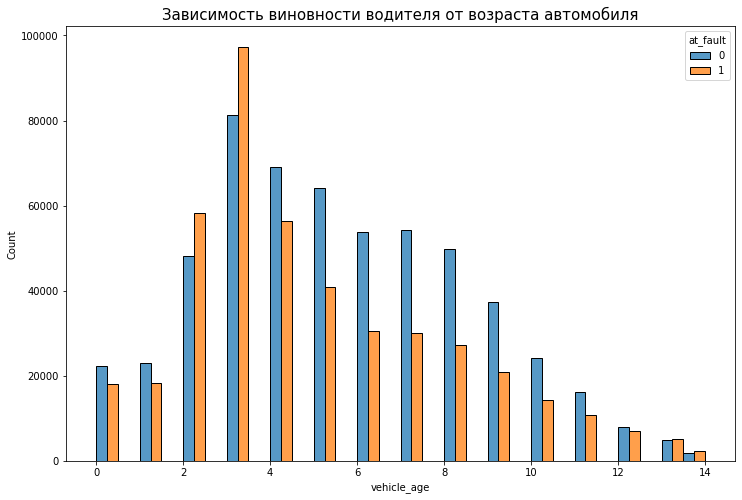

In [25]:
# Создайте sql-запрос
query = '''
SELECT
    v.vehicle_age,
    p.at_fault
FROM
    vehicles AS v
    JOIN parties AS p
        ON (p.case_id = v.case_id AND p.party_number = v.party_number)
WHERE 
    v.vehicle_age IS NOT NULL
    AND
    v.vehicle_age < 15;
'''
vehicle_age_fault = pd.read_sql_query(query, con=engine)

# Постройте гистограмму
plt.figure(figsize=(12, 8))
sns.histplot(data=vehicle_age_fault, x='vehicle_age', hue='at_fault', multiple="dodge", bins=28)
plt.title("Зависимость виновности водителя от возраста автомобиля", fontsize=15);

**Вывод:** Чаще всего виновниками ДТП оказываются водители, у которых возраст автомобилей составляет 2-3 года. Владельцы новых машин и машин, возрастом от 4 до 12 лет, реже являются виновниками аварий: то есть бОльший возраст автомобиля не увеличивает вероятность возникновения аварии.

**Решение задачи №4:** Проведите анализ состояния водителя (физического или с учетом принятых лекарств) с типом аварии (связь collisions.type_of_collision и parties.party_drug_physical).

In [26]:
# Создайте sql-запрос
query = '''
SELECT
    c.type_of_collision,
    p.party_drug_physical
FROM
    collisions AS c
    JOIN parties AS p
        ON (p.case_id = c.case_id)
WHERE 
    p.party_drug_physical IS NOT NULL
    AND c.type_of_collision IS NOT NULL;
'''
coll_type = pd.read_sql_query(query, con=engine)

Посмотрим, присутсвуют ли неинформативные категории состояния:

In [27]:
coll_type['party_drug_physical'].value_counts()

G                        230778
not applicable           167551
under drug influence      13141
sleepy/fatigued           12585
impairment - physical      4158
Name: party_drug_physical, dtype: int64

Удалим категории "G (не известно)", "not applicable"

In [28]:
coll_type = coll_type.query('party_drug_physical not in ["G", "not applicable"]')

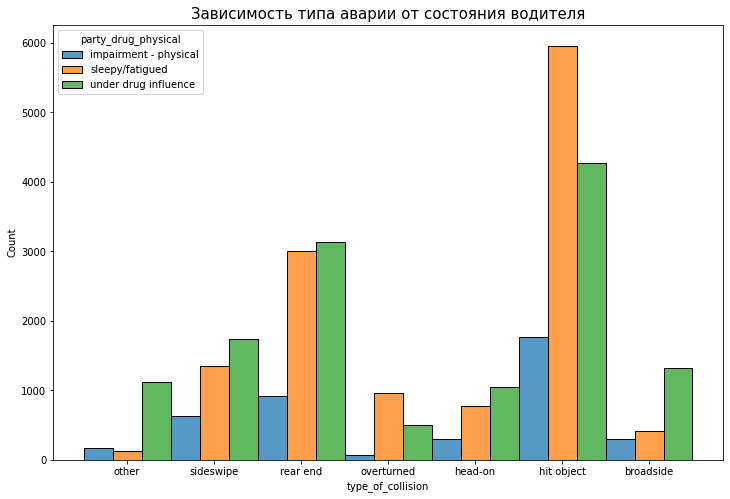

In [29]:
# Постройте гистограмму
plt.figure(figsize=(12, 8))
sns.histplot(data=coll_type, x='type_of_collision', hue='party_drug_physical',multiple="dodge")
plt.title("Зависимость типа аварии от состояния водителя", fontsize=15);

**Вывод:** Наибольшее количество аварий, связанных с состоянием водителя, - это удар объекта (hit object), и большинство водителей, совершившие аварию данного типа, были в уставшем или сонном состоянии. Также уставшее/сонное состояние водители часто является причиной переворота автомобиля (overturned). В остальных типах аварий чаще (по сравнению с другими категориями состояния) участвуют водители, находившиеся под действием препаратов.  

## Создание модели для оценки водительского риска

### Подготовка набора данных 

Подготовим набор данных на основе первичного предположения заказчика:
 
* Выберем тип виновника — только машина (car).
* Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
* Для моделирования возьмем данные только за 2012 год.
* Обязательное условие — учесть фактор возраста автомобиля.

Проведём первичный отбор факторов, необходимых для модели: при выгрузке данных отберём только те поля, которые предположительно могут влиять на вероятность ДТП (но не затрагивают описание уже случившегося события, как, например, количество участников, тип столкновения или тип нарушения).

In [30]:
query = '''
WITH 
    -- выберем case_id за 2012 год, в которых повреждения участников серьезнее царапины
    case_ids_2012_not_scratch AS
    (SELECT 
        case_id
     FROM
         collisions
     WHERE 
         collision_date::date BETWEEN '2012-01-01' AND '2012-12-31'
         AND
         collision_damage NOT LIKE 'scratch'),
    
    -- объединим таблицы parties и vehicles
    -- учтём тип участника происшествия - car
    -- нам важно учесть возраст автомобиля, поэтому будем отбирать только те записи, которые содержат возраст
    -- при отборе учтем только записи с подходящим case_id 
    parties_vehicles AS
    (SELECT
        p.case_id,
        p.party_number,
        p.at_fault,
        p.party_sobriety,
        p.party_drug_physical,
        p.insurance_premium,
        v.vehicle_age,
        v.vehicle_transmission,
        v.vehicle_type
     FROM 
        parties AS p
        JOIN vehicles as v
            ON (p.case_id = v.case_id AND p.party_number = v.party_number)
     WHERE 
        p.case_id IN (SELECT * FROM case_ids_2012_not_scratch)
        AND
        p.party_type LIKE 'car'
        AND 
        v.vehicle_age IS NOT NULL)


SELECT 
    pv.at_fault, --целевой признак
    pv.party_sobriety, -- уровень трезвости водителя  - сильно влияет
    pv.party_drug_physical, -- состояние водителя - также влияет
    pv.insurance_premium, -- сумма страховки может влиять на (само)уверенность водителя
    pv.vehicle_age, -- возраст автомобиля, обязательное условие
    pv.vehicle_transmission, -- тип КПП (скорее всего не влияет, надо проверить)
    pv.vehicle_type, -- тип кузова (скорее всего сильно не влияет, надо проверить)
    c.weather_1, -- погодные условия - могут влять (тормозой путь, видимость и т.п.)
    c.road_surface, -- состояние дороги от погодных условий - см. предыдущий пункт
    c.road_condition_1, -- состояние дорожного полотна (препятствия, ямы и т.п.) - влияет
    c.lighting, -- освещение - в сумерки и темное время хуже оценивается расстояние
    c.control_device, -- устройство управления - может влиять, если не работает или затемнено
    c.county_location, -- геогр. район - важно для оценки уровня риска на маршруте
    c.location_type, -- тип дороги - может определять скоростной режим
    CAST(DATE_PART('month', c.collision_date::date) AS INT) AS month -- время года также может влиять
    
    
FROM 
    parties_vehicles AS pv
    JOIN collisions AS c 
        ON pv.case_id = c.case_id;
'''
data = pd.read_sql_query(query, con=engine)

In [31]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54554 entries, 0 to 54553
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   at_fault              54554 non-null  int64  
 1   party_sobriety        53718 non-null  object 
 2   party_drug_physical   2686 non-null   object 
 3   insurance_premium     54135 non-null  float64
 4   vehicle_age           54554 non-null  int64  
 5   vehicle_transmission  53979 non-null  object 
 6   vehicle_type          54554 non-null  object 
 7   weather_1             54389 non-null  object 
 8   road_surface          54225 non-null  object 
 9   road_condition_1      54317 non-null  object 
 10  lighting              54402 non-null  object 
 11  control_device        54348 non-null  object 
 12  county_location       54554 non-null  object 
 13  location_type         25511 non-null  object 
 14  month                 54554 non-null  int64  
dtypes: float64(1), int6

,at_fault,party_sobriety,party_drug_physical,insurance_premium,vehicle_age,vehicle_transmission,vehicle_type,weather_1,road_surface,road_condition_1,lighting,control_device,county_location,location_type,month
0,0,had not been drinking,None,58.000,2,manual,sedan,fog,dry,construction,dark with street lights,none,san francisco,highway,1
1,0,had not been drinking,None,23.000,3,auto,sedan,cloudy,dry,normal,daylight,none,santa clara,ramp,3
2,0,None,None,52.000,8,auto,coupe,clear,dry,None,daylight,functioning,santa clara,None,2
3,0,had not been drinking,None,33.000,5,manual,coupe,clear,dry,normal,dark with street lights,functioning,los angeles,None,3
4,0,had not been drinking,None,27.000,4,auto,sedan,clear,dry,normal,dark with street lights,none,los angeles,highway,1


### Статистическое исследование отобранных факторов

Проведём первичное исследование получнных факторов с помощью ProfileReport

In [32]:
%%time

profile_data = ProfileReport(data)
profile_data.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 19.8 s, sys: 3.09 s, total: 22.9 s
Wall time: 19.1 s


Рассмотрим внимательнее каждый столбец.

* at_fault - целевой признак, практически сбалансирован, дополнительных действий не требуется
* party_sobriety - присутсвут 1.5% пропусков - можно будет заменить категорией impairment unknown
* party_drug_physical - очень много пропусков (более 95%), максимальное количество участников попадает под категорию G - Impairment Unknown, поэтому данная колонка может считаться неинформативной и в дальнейшем будет удалена.
* insurance_premium - распределение не содержит сильных выбросов, однако можно немного подкорректировать предельные значения. Можно также обработать немногочисленные пропуски - заменить их на медианные значения.
* vehicle_age - содержит множество нулей, присутствуют выбросы - нужно исследовать значения столбца подробнее
* vehicle_transmission - содержит два типа КПП, практически равных по количеству появлений, и небольшое количество пропусков. Можно изучить, как связан целевой признак с каждым из классов и есть ли необходимость сохранять этот столбец.
* vehicle_type - большинство машин относятся к классу седан: это может быть связано с тем, что в целом автомобилей с таким типом кузова больше, поэтому и участвуют в ДТП они чаще. Данный признак может внести искажения при обучении модели, поэтому на данном этапе откажемся от него.
* weather_1, road_surface, road_condition_1  - существуют малочисленные категории - можно их объединить
* lighting - можно объединить категории 'dark with no street lights' и 'dark with street lights not functioning'
* control_device - чаще всего аварии случались при остутствии устройства управления. Можно объединить пропуски, 'not functioning' и 'obscured' в категорию 'none'
* county_location - в рамках задачи проекта необходимо оценивать риск ДТП на определённом маршруте, поэтому данный столбец тоже можно оставить.
* location_type - более 50% пропусков, которые трудно заменить, не внеся искажений, поэтому в дальнейшем удалим данный столбец.
* month - в полученной выборке преобладают ДТП, произошедшие в период с января по май 2012 года. При проведении анализа количества аварий за весь период наблюдений распределение сильно отличалось: соотношение количества аварий в летние месяцы было значительно больше, поэтому данная статистика может быть актуальна только для 2012 года. Поскольку у нас есть данные о погоде и состоянии дороги, удалим из рассмотрения этот столбец.

Таким образом, необходимы следующие действия:
* обработка пропусков в колонках: party_sobriety, insurance_premium
* обработка выбросов: vehicle_age
* объединение категорий: party_sobriety, weather_1, road_surface, road_condition_1, lighting, control_device, county_location
* дополнительный анализ: vehicle_transmission
* удаление колонок: party_drug_physical, vehicle_type, location_type, month

### Корректировка признаков

In [33]:
df = data.copy()

In [34]:
# пропуски
df['party_sobriety'] = df['party_sobriety'].fillna('impairment unknown')
df['insurance_premium'] = df['insurance_premium'].fillna(df['insurance_premium'].median())

print('party_sobriety NA:', df['party_sobriety'].isna().sum().sum())
print('insurance_premium NA:', df['insurance_premium'].isna().sum().sum())

party_sobriety NA: 0
insurance_premium NA: 0


Для коррекции столбца 'insurance_premium' рассмотрим внимательнее распределение этого признака.

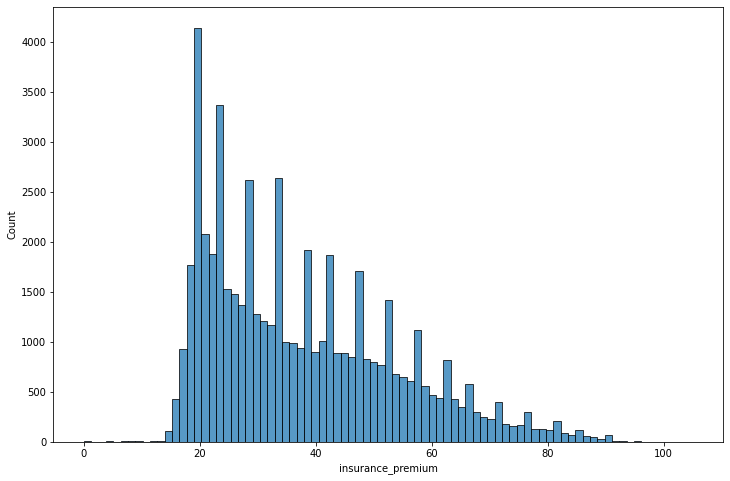

In [35]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='insurance_premium');

Можем обозначить границы, в которых должна находиться сумма страховых выплат: (16, 83).

In [36]:
df = df.query('16 < insurance_premium < 83')

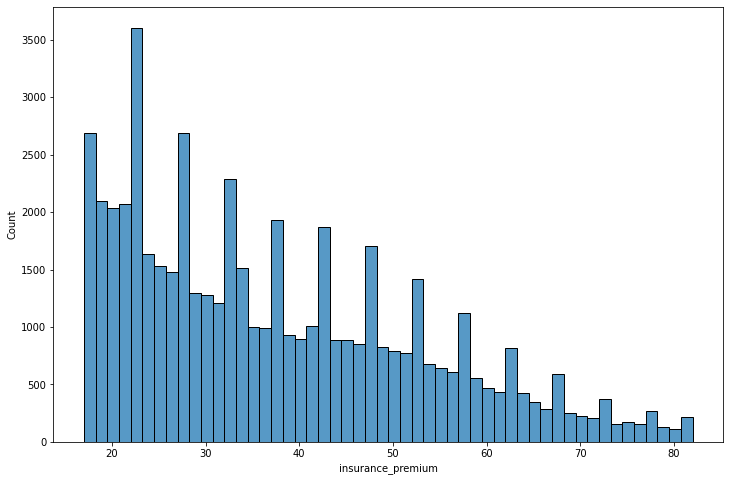

In [37]:
# проверим изменения
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='insurance_premium');

Интересно, что данные по страховым выплатам часто принимают определённые значения - исходя из этого можно предположить, что данный столбец можно рассматривать не только как числовой, но и как категориальный, если произвести объединение значений в категории по интервалам.   
В данной работе всё-таки будем считать данный столбец числовым, чтобы не внести лишних искажений в данные.

In [38]:
# выбросы
print(df['vehicle_age'].value_counts())

3      10965
4       7143
2       5649
5       5544
6       3909
7       3806
8       3480
0       3068
9       2752
1       2518
10      1915
11      1359
12       849
13       337
14       114
15        20
16         6
17         3
161        2
19         1
Name: vehicle_age, dtype: int64


Автомобили возрастом 13 лет и старше встречаются редко - объединим их в категорию '13'

In [39]:
cond = df['vehicle_age'] < 13
df['vehicle_age'] = df['vehicle_age'].where(cond, other=13)
print(df['vehicle_age'].value_counts())

3     10965
4      7143
2      5649
5      5544
6      3909
7      3806
8      3480
0      3068
9      2752
1      2518
10     1915
11     1359
12      849
13      483
Name: vehicle_age, dtype: int64


In [40]:
# объединение категорий:
for _ in ['party_sobriety', 'weather_1', 'road_surface', 
          'road_condition_1', 'lighting', 'control_device']:
    print(_)
    print(df[_].value_counts())
    print('NA:', df[_].isna().sum())
    print()

party_sobriety
had not been drinking                     46173
had been drinking, under influence         4347
impairment unknown                         1891
had been drinking, not under influence      556
had been drinking, impairment unknown       243
not applicable                              230
Name: party_sobriety, dtype: int64
NA: 0

weather_1
clear      42819
cloudy      8019
raining     2077
fog          170
snowing      150
other         32
wind          11
Name: weather_1, dtype: int64
NA: 162

road_surface
dry         47712
wet          5021
snowy         345
slippery       41
Name: road_surface, dtype: int64
NA: 321

road_condition_1
normal            51351
construction        975
obstruction         239
other               218
holes               211
loose material      120
reduced width        64
flooded              29
Name: road_condition_1, dtype: int64
NA: 233

lighting
daylight                                   36054
dark with street lights                    1043

In [41]:
# объединение категорий:
df['party_sobriety'] = df['party_sobriety'].where(df['party_sobriety']=='not applicable', 
                                                  other='impairment unknown')

df['weather_1'] = df['weather_1'].where(df['weather_1'].isin(['clear', 'cloudy', 'raining']), other='other')

df['road_surface'] = df['road_surface'].where(df['road_surface']=='dry', other='wet')

df['road_condition_1'] = df['road_condition_1'].where(df['road_condition_1']=='normal', other='other')

df['lighting'] = df['lighting'].where(df['lighting'].isin(['daylight', 
                                                        'dark with street lights',
                                                        'dusk or dawn']), 
                                      other='dark with no street lights')

df['control_device'] = df['control_device'].where(df['control_device'].isin(['none','functioning']), other='none')

# проверка
for _ in ['party_sobriety', 'weather_1', 'road_surface', 
          'road_condition_1', 'lighting', 'control_device']:
    print(_)
    print(df[_].value_counts())
    print('NA:', df[_].isna().sum())
    print()

party_sobriety
impairment unknown    53210
not applicable          230
Name: party_sobriety, dtype: int64
NA: 0

weather_1
clear      42819
cloudy      8019
raining     2077
other        525
Name: weather_1, dtype: int64
NA: 0

road_surface
dry    47712
wet     5728
Name: road_surface, dtype: int64
NA: 0

road_condition_1
normal    51351
other      2089
Name: road_condition_1, dtype: int64
NA: 0

lighting
daylight                      36054
dark with street lights       10432
dark with no street lights     5263
dusk or dawn                   1691
Name: lighting, dtype: int64
NA: 0

control_device
none           36332
functioning    17108
Name: control_device, dtype: int64
NA: 0



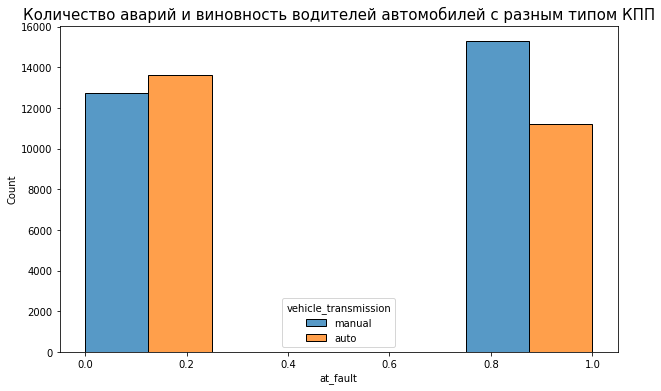

In [42]:
# проверка vehicle_transmission
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='at_fault', hue='vehicle_transmission', multiple="dodge", bins=4)
plt.title("Количество аварий и виновность водителей автомобилей с разным типом КПП", fontsize=15);

Проанализировав гистограмму, можно обнаружть, что водители на автомобилях с МКПП чаще признаются виновниками аварий, чем водители с АКПП, поэтому данный столбец необходимо оставить.  
В данном столбце содержится 1% пропусков. Чтобы не искажать статистику, удалим строки, содержащие пропуски.

In [43]:
# удаление лишних столбцов
df = df.drop(['party_drug_physical', 'vehicle_type', 'location_type', 'month'], axis=1)

In [44]:
# удалим строки с пропусками
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52878 entries, 0 to 54553
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   at_fault              52878 non-null  int64  
 1   party_sobriety        52878 non-null  object 
 2   insurance_premium     52878 non-null  float64
 3   vehicle_age           52878 non-null  int64  
 4   vehicle_transmission  52878 non-null  object 
 5   weather_1             52878 non-null  object 
 6   road_surface          52878 non-null  object 
 7   road_condition_1      52878 non-null  object 
 8   lighting              52878 non-null  object 
 9   control_device        52878 non-null  object 
 10  county_location       52878 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.8+ MB


На завершающем этапе проверим наличие дубликатов

In [45]:
print('Duplicates before:', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print('\nDuplicates now:',df.duplicated().sum())
print('\nShape:',df.shape)
print('\nРаспределение целевого признака, доли:')
print(df['at_fault'].value_counts(normalize=True))

Duplicates before: 15316

Duplicates now: 0

Shape: (37562, 11)

Распределение целевого признака, доли:
0   0.506
1   0.494
Name: at_fault, dtype: float64


После отбора, статистического исследования и корректировки факторов, в подготовленной таблице содержится почти 38000 строк, 10 столбцов признаков и целевой признак. Произведём подготовку данных к обучению моделей.

### Подготовка данных к обучению моделей

Выделим категориальные и количественные столбцы

In [46]:
categorical = ['party_sobriety', 'weather_1', 'road_surface', 
               'road_condition_1', 'lighting', 'control_device', 
               'county_location', 'vehicle_transmission']
numeric = ['insurance_premium', 'vehicle_age']

Выделим матрицу признаков и вектор целевого признака

In [47]:
features = df.drop('at_fault', axis=1)
target = df['at_fault']

print(features.shape)
print(target.shape)

(37562, 10)
(37562,)


Разделим выборку на тренировочную и тестовую подвыборки

In [48]:
def split_scale(features, target):
    """
    Функция принимает на вход таблицу признаков features и столбец целевого признака target, 
    и возвращает тренировочную и тестовую выборку для features и target в соотношении 3:1
    """
    
    # разделим выборку на две части: обучающую и тестовую
    (features_train, features_test, 
     target_train, target_test) = train_test_split(features, 
                                                   target,
                                                   test_size=.25,
                                                   random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

    
    return (features_train, features_test,
           target_train, target_test)

In [49]:
features_train, features_test, \
target_train, target_test = split_scale(features, target)

print('Train:', features_train.shape, target_train.shape)
print('Test:', features_test.shape, target_test.shape)

Train: (28171, 10) (28171,)
Test: (9391, 10) (9391,)


Закодируем категориальные признаки двумя методами: One Hot Encoding (подходит для линейных моделей) и Ordinal Encoding (для ускорения моделей на базе решающего дерева):

In [50]:
# One Hot Encoding
features_train_ohe = features_train.copy().reset_index(drop=True)
features_test_ohe = features_test.copy().reset_index(drop=True)

ohe_encoder = OneHotEncoder(handle_unknown='ignore') 
ohe_encoder.fit(features_train_ohe[categorical]) 
    

features_train_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_train_ohe[categorical]).toarray()).astype(int)
features_train_ohe = features_train_ohe.join(features_train_ohe_cat)
features_train_ohe = features_train_ohe.drop(categorical, axis= 1)


features_test_ohe_cat = pd.DataFrame(ohe_encoder.transform(features_test_ohe[categorical]).toarray()).astype(int)
features_test_ohe = features_test_ohe.join(features_test_ohe_cat)
features_test_ohe = features_test_ohe.drop(categorical, axis= 1)


                                             
print('Train OHE:', features_train_ohe.shape)
print('Test OHE:', features_test_ohe.shape)

Train OHE: (28171, 78)
Test OHE: (9391, 78)


In [51]:
# Ordinal Encoding

features_train_oe = features_train.copy().reset_index(drop=True)
features_test_oe = features_test.copy().reset_index(drop=True)

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
encoder.fit(features_train_oe[categorical]) 
    

features_train_oe[categorical] = pd.DataFrame(encoder.transform(features_train_oe[categorical]))

features_test_oe[categorical] = pd.DataFrame(encoder.transform(features_test_oe[categorical]))

                                             
print('Train OE:', features_train_oe.shape)
print('Test OE:', features_test_oe.shape)

Train OE: (28171, 10)
Test OE: (9391, 10)


### Вывод

На основе первичного предположения заказчика был подготовлен набор данных, состоящий из целевого признака at_fault и факторов, которые могут влиять на возникновение аварии. В выборку вошли данные только за 2012 год по авариям со значимыми повреждениями, в качестве типа виновника был выбран автомобиль (car).   
Данные были изучены и дополнительно отфильтрованы: в итоговой выборке осталось 10 столбцов признаков и целевой признак.  
Данные были предварительно обработаны: пропуски заменены, выбросы откорректированы, некоторые категории в столбцах объединены.  
Данные были подготовлены к задачам ML: разделены на train/test выборки, числовые признаки отмасштабированы, категориальные признаки перекодированы методами One Hot Encoding и Ordinal Encoding

## Поиск лучшей модели

Рассмотрим 4 классификатора:
* логистическая регрессия
* случайый лес
* CatBoost
* LightGBM

Для каждой модели с помощью кросс-валидации подберем лучшие гиперпараметры.  
В качестве метрики выберем полноту: при высоком риске возникновения аварии система должна предупреждать водителя и давать рекомендации по маршруту, поэтому необходимо спрогнозировать как можно больше потенциальных угроз аварии и оповестить максимальное количество водителей о возможных трудностях на дороге.

### Логистическая регрессия

In [52]:
%%time

param_dist = {
    'solver':['lbfgs', 'liblinear', 'newton-cg'],
    'penalty': ['l1','l2']
}

model = LogisticRegression(random_state=RANDOM_STATE)
grid = GridSearchCV(model, 
                          param_dist, 
                          cv = 4, 
                          scoring = 'recall',  
                          n_jobs = -1,
                          verbose=2)

grid.fit(features_train_ohe, target_train)
# выведем модель с наилучшей оценкой
best_estimator = grid.best_estimator_
print("Параметры лучшей модели логистической регрессии:\n", best_estimator)
print()
# выведем наилучшую оценку
recall_log = grid.best_score_ 
print("Полнота лучшей модели логистической регрессии:", recall_log.round(3))
print()

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/home/alina/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.52899137        nan 0.52783611 0.52769162 0.52769162]
  category=UserWarning


Параметры лучшей модели логистической регрессии:
 LogisticRegression(penalty='l1', random_state=12345, solver='liblinear')

Полнота лучшей модели логистической регрессии: 0.529

CPU times: user 693 ms, sys: 47.3 ms, total: 740 ms
Wall time: 6.47 s


### Случайный лес

In [53]:
%%time

param_dist = {
        'n_estimators':range(200,500,50),
        'max_depth':range(2,15,1),
        'max_features':['auto', 'sqrt'],
        'min_samples_split':range(2,5),
        'min_samples_leaf': range(1,3),
        'bootstrap':[True, False]
}

model = RandomForestClassifier(random_state=RANDOM_STATE)
grid = RandomizedSearchCV(model, 
                          param_dist, 
                          cv = 4, 
                          scoring = 'recall', 
                          n_iter=10, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                         verbose=2)

grid.fit(features_train_oe, target_train)
# выведем модель с наилучшей оценкой
best_estimator = grid.best_estimator_
print("Параметры лучшей модели решающего леса:\n", best_estimator)
print()
# выведем наилучшую оценку
recall_forest = grid.best_score_ 
print("Полнота лучшей модели решающего леса:", recall_forest.round(3))
print()

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Параметры лучшей модели решающего леса:
 RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_split=3,
                       n_estimators=350, random_state=12345)

Полнота лучшей модели решающего леса: 0.494

CPU times: user 5.28 s, sys: 33.4 ms, total: 5.31 s
Wall time: 1min 3s


### Градиентный бустинг CatBoost

In [54]:
%%time

param_cb = {
    'learning_rate': [0.05, 0.3, 0.001],
    'depth': range(2, 10),
    'l2_leaf_reg': [1, 3, 5],
    'grow_policy': ['SymmetricTree', 'Lossguide'],
    'iterations': range(300, 1001, 100)
}


    
train_pool = cb.Pool(features_train, 
                     target_train, 
                     cat_features=categorical)
test_pool = cb.Pool(features_test, cat_features=categorical)


model = cb.CatBoostClassifier(eval_metric='Recall', 
                           verbose=0)

randomized_search_result = model.randomized_search(param_cb, 
                                                   X=train_pool,
                                                   cv = 4, 
                                                   n_iter=10,
                                                   calc_cv_statistics=True)
print('Лучшие параметры для CatBoost:\n', randomized_search_result['params'])
print()


bestTest = 0.5093853515
bestIteration = 588

0:	loss: 0.5093854	best: 0.5093854 (0)	total: 8s	remaining: 1m 11s

bestTest = 0.5215311005
bestIteration = 122

1:	loss: 0.5215311	best: 0.5215311 (1)	total: 14s	remaining: 56.1s

bestTest = 0.5288921605
bestIteration = 866

2:	loss: 0.5288922	best: 0.5288922 (2)	total: 29.2s	remaining: 1m 8s

bestTest = 0.5222672065
bestIteration = 0

3:	loss: 0.5222672	best: 0.5288922 (2)	total: 47.1s	remaining: 1m 10s

bestTest = 0.5439823335
bestIteration = 0

4:	loss: 0.5439823	best: 0.5439823 (4)	total: 53.5s	remaining: 53.5s

bestTest = 0.5075450865
bestIteration = 839

5:	loss: 0.5075451	best: 0.5439823 (4)	total: 1m 29s	remaining: 60s

bestTest = 0.5745307324
bestIteration = 0

6:	loss: 0.5745307	best: 0.5745307 (6)	total: 1m 40s	remaining: 43.1s

bestTest = 0.5745307324
bestIteration = 0

7:	loss: 0.5745307	best: 0.5745307 (6)	total: 1m 55s	remaining: 28.8s

bestTest = 0.5333087965
bestIteration = 396

8:	loss: 0.5333088	best: 0.5745307 (6)	total

In [55]:
print('Лучшие параметры для CatBoost:\n', randomized_search_result['params'])
recall_cb = np.mean([0.5950389386, 0.610614364, 0.5111047015, 0.48370349])
print()
print('Полнота лучшей модели CatBoost:', round(recall_cb, 3))

Лучшие параметры для CatBoost:
 {'depth': 3, 'l2_leaf_reg': 3, 'iterations': 800, 'learning_rate': 0.05, 'grow_policy': 'Lossguide'}

Полнота лучшей модели CatBoost: 0.55


### Градиентный бустинг LightGBM

In [56]:
# подготовим категориальные признаки для обучения LightGBM
for c in categorical:
    features_train[c] = features_train[c].astype('category')
print(features_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28171 entries, 35754 to 20962
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   party_sobriety        28171 non-null  category
 1   insurance_premium     28171 non-null  float64 
 2   vehicle_age           28171 non-null  float64 
 3   vehicle_transmission  28171 non-null  category
 4   weather_1             28171 non-null  category
 5   road_surface          28171 non-null  category
 6   road_condition_1      28171 non-null  category
 7   lighting              28171 non-null  category
 8   control_device        28171 non-null  category
 9   county_location       28171 non-null  category
dtypes: category(8), float64(2)
memory usage: 884.1 KB
None


In [57]:
%%time
 
param_lgbm = {
    'learning_rate': [0.01, 0.1, 0.05],
    'num_leaves': [30, 90, 120, 200],
    'max_depth' : range(2, 11)
    }

model_lgbm = lgb.LGBMClassifier(random_state=RANDOM_STATE)
grid_lgbm = RandomizedSearchCV(model_lgbm, 
                          param_lgbm, 
                          cv = 4, 
                          scoring = 'recall', 
                          n_iter=50, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                          verbose=2)
grid_lgbm.fit(features_train, target_train)
# выведем модель с наилучшей оценкой
best_estimator_lgbm = grid_lgbm.best_estimator_
print("Параметры лучшей модели LightGBM:\n", best_estimator_lgbm)
print()
# выведем наилучшую оценку
recall_lgbm = grid_lgbm.best_score_ 
print("Полнота лучшей модели LightGBM:", round(recall_lgbm, 3))
print()

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Параметры лучшей модели LightGBM:
 LGBMClassifier(max_depth=3, num_leaves=30, random_state=12345)

Полнота лучшей модели LightGBM: 0.501

CPU times: user 3.03 s, sys: 104 ms, total: 3.14 s
Wall time: 33.8 s


### Сравнение моделей

In [58]:
compare = {'model': ['LogisticRegression',
                     'RandomForestClassifier',
                     'CatBoostClassifier',
                     'LGBMClassifier'], 
           'Recall': [recall_log,
                      recall_forest,
                      recall_cb,
                      recall_lgbm]}
compare = pd.DataFrame(data=compare)
compare.sort_values(by='Recall', ascending=False)

,model,Recall
2,CatBoostClassifier,0.550
0,LogisticRegression,0.529
3,LGBMClassifier,0.501
1,RandomForestClassifier,0.494


Наибольшее значение метрики recall получается при использовании модели градиентного бустинга CatBoost: проверим эту модель на тестовой выборке.

## Проверка лучшей модели в работе

In [59]:
best_model = cb.CatBoostClassifier(depth=3, 
                                   l2_leaf_reg=3, 
                                   iterations=800, 
                                   learning_rate=0.05, 
                                   grow_policy='Lossguide', verbose=0)
best_model.fit(train_pool)
probabilities_test = best_model.predict_proba(test_pool)[:, 1]
predictions_test = best_model.predict(test_pool)
recall = recall_score(target_test, predictions_test)
print('Полнота лучшей модели на тестовой выборке:', round(recall,3))

Полнота лучшей модели на тестовой выборке: 0.507


Проведём графический анализ итоговой модели: выведем матрицу ошибок, построим ROC-кривую, а также график Precision-Recall.

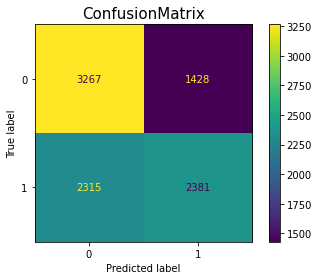

In [60]:
cm = confusion_matrix(target_test, predictions_test, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot()
plt.title("ConfusionMatrix", fontsize=15)
plt.show();

Анализ матрицы ошибок позволяет увидеть, что диагональные элементы True-Positive и True-Negative имеют наибольшие значения, но при этом не так ярко выражены на фоне False-Positive и False-Negative - модель часто ошибается на предсказании виновности учстника.  
Можно повлиять на ситуацию заданием порога: уменьшим порог для определения первого класса, выведем полноту и матрицу ошибок.

Recall при задании порога 0.663


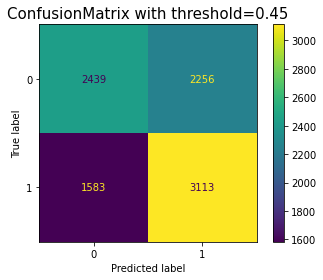

In [61]:
predictions_thr = [0 if x<0.45 else 1 for x in probabilities_test]
print('Recall при задании порога', round(recall_score(target_test, predictions_thr),3))

cm = confusion_matrix(target_test, predictions_thr, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

disp.plot()
plt.title("ConfusionMatrix with threshold=0.45", fontsize=15)
plt.show();

При задании порога значение полноты улучшилось - значение TN увеличилось, но при этом выросло значение FN, то есть снизилась точность предсказаний.  
Построим графики ROC-кривой и Precision-Recall.

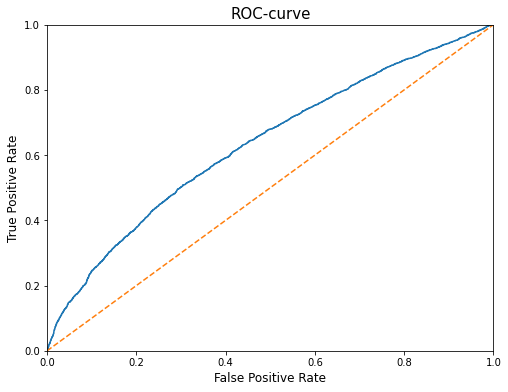

In [62]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
    

plt.xlabel("False Positive Rate", fontsize=12) 
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC-curve", fontsize=15)
plt.show()

Видно, что наша модель работает лучше случайной модели: площадь под графиком больше 0.5.

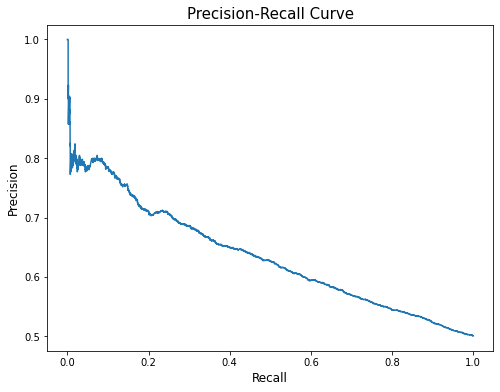

In [63]:
precision, recall, threshold = precision_recall_curve(target_test, probabilities_test)

plt.figure(figsize=(8, 6))

plt.plot(recall, precision)


plt.ylabel('Precision', fontsize=12)
plt.xlabel('Recall', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=15)
plt.show()

Как мы уже определили, при умньшении порога значение полноты будет стремиться к единице, при этом значение точности будет опускаться до 0.5 (поскольку выборка сбаланирована по классам виновности участников, в 50% случаев модель будет верно предсказывать первый класс при полноте, стремящейся к 1 - то есть, по сути, при константной модели, всегда предсказывающей первый класс). В итоге, в рамках выбранной модели не удаётся улучшить полноту, не снизив точность.

Таким образом, поскольку в данной задаче важно оповестить максимум водителей о возможных неприятностях на дороге, можно использовать порог 0.45, чтобы увеличить полноту до значения 0.67.

Проанализируем важность основных факторов, влияющих на вероятность ДТП.

,feature,importance
0,insurance_premium,40.290
1,county_location,13.390
2,vehicle_age,11.360
3,lighting,9.950
4,vehicle_transmission,8.520
5,control_device,7.600
6,road_surface,4.230
7,weather_1,3.920
8,road_condition_1,0.530
9,party_sobriety,0.190


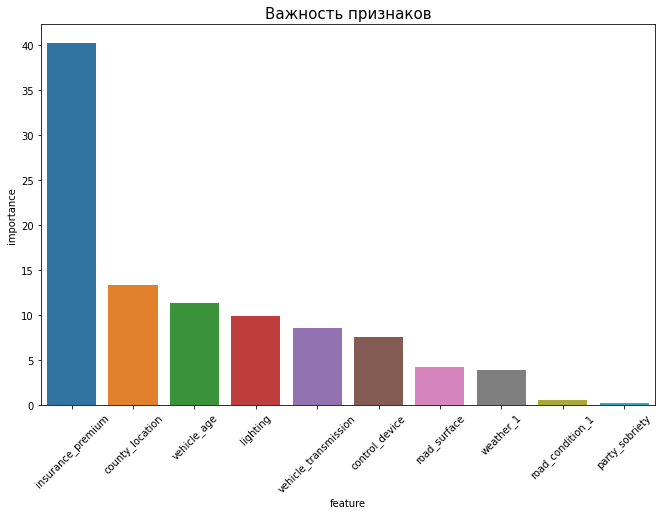

In [64]:
feature_list = list(features_train.columns)
# Получим значения важности признаков
importances = list(best_model.feature_importances_)
# Сформируем список из пар признак + важность признака
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Отсортируем признаки по убыванию важности
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Выведем на экран 10 важных признаков
feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
display(feature_importances.head(10))


# построим график
plt.figure(figsize=(11, 7))
sns.barplot(data=feature_importances, x="feature", y="importance")
plt.title('Важность признаков', fontsize=15)
plt.xticks(rotation=45);

Наиболее важным фактором, влияющим на вероятность ДТП, является сумма страховки.  
Для графического анализа будем использовать гистограмму, в которой отразим зависимость количества ДТП от суммы страховки для двух классов.

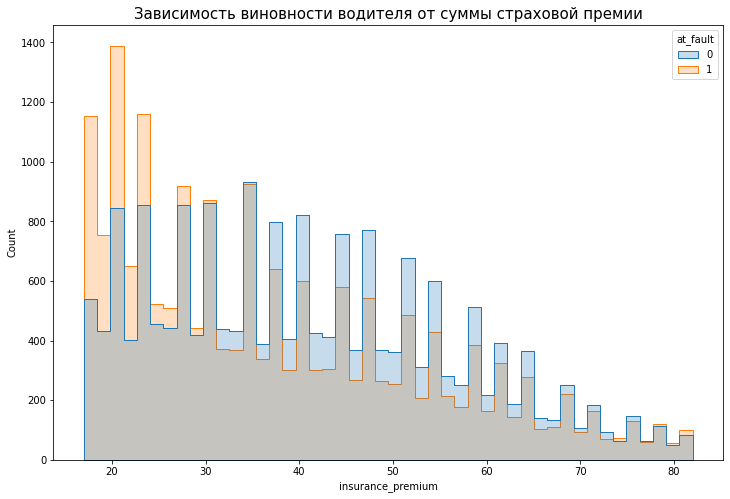

In [65]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='insurance_premium', hue='at_fault', element='step')
plt.title("Зависимость виновности водителя от суммы страховой премии", fontsize=15);

Проанализировав график, можно обнаружить, что при низких суммах страховой премии (до 30 тыс.) водители чаще являются виновниками аварии. При этом при средних значениях стоимости страховки (от 38 до 70 тыс.) водители чаще признаются невиновными в ДТП.  
В данном случае было бы полезно знать условия страхования автомобилей в США. На данный момент можно предположить, что стоимость страховки связана со стоимостью автомобиля, поэтому водители более дорогих машин предпочитают аккуратный стиль вождения из-за дорогостоящего ремонта в случае аварии по их вине. В любом случае, эту информацию можно запрашивать и проверять при регистрации водителя в каршеринговой компании и учитывать во время посадки водителя, поэтому дополнительного оборудования в автомобиле для проверки этого фактора не требуется. 

## Вывод

Целью проекта является построение модели для предсказания ДТП. Для реализации цели были вполнены следующие задачи:

* Проведён первичный обзор базы данных. В базе представлены данные о более 1.4 млн происшествий на юго-западе США, собранные с января 2009 года по июль 2020 года. Таблицы связаны через ключ case_id, содержащийся в таблице collisions.
* Проведён статистический анализ факторов ДТП, созданы аналитические задачи.
* Подготовлен набор данных, состоящий из целевого признака at_fault и факторов, которые могут влиять на возникновение аварии. В выборку вошли данные только за 2012 год по авариям со значимыми повреждениями, в качестве типа виновника был выбран автомобиль (car).
* Данные были изучены и дополнительно отфильтрованы: в итоговой выборке осталось 10 столбцов признаков и целевой признак.
* Данные были предварительно обработаны: пропуски заменены, выбросы откорректированы, некоторые категории в столбцах объединены.
* Данные были подготовлены к задачам ML: разделены на train/test выборки, числовые признаки отмасштабированы, категориальные признаки перекодированы методами One Hot Encoding и Ordinal Encoding

Далее были обучены 4 модели классификации при различных гиперпараметрах:
* логистическая регрессия
* случайый лес
* CatBoost
* LightGBM

В качестве метрики для обучения моделей была выбрана полнота (Recall). В качестве лучшей модели была выбрана модель градиентного бустинга CatBoost: recall на тестовой выборке 0.504.  
* Был проведён графический анализ предсказаний итоговой модели: обнаружено, что в рамках данной задачи невозможно улучшить значение полноты, не потеряв при этом в точности.  
* Проведён анализ важности факторов: наиболее важным фактором, влияющим на вероятность возникновения ДТП, является сумма страховки. При низких суммах страховой премии (до 30 тыс.) водители чаще являются виновниками аварии. При этом при средних значениях стоимости страховки (от 38 до 70 тыс.) водители чаще признаются невиновными в ДТП.

Для заказчика также важно понять помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
* **Возможно ли создать адекватную систему оценки водительского риска при выдаче авто?** - На данном этапе модель недостаточно хорошо справляется с предсказанием виновности участника, возможно, стоит учесть дополнительные факторы.
* **Какие ещё факторы нужно учесть?** - Стаж водителя, возраст водителя
* **Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?** - По результатам исследования ответ на этот вопрос нельзя предоставить